<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
! git clone https://github.com/ZhyShe/18ma573ZhiyuanShe

fatal: destination path '18ma573ZhiyuanShe' already exists and is not an empty directory.


In [16]:
cd /content/18ma573ZhiyuanShe/src/

/content/18ma573ZhiyuanShe/src


In [17]:
ls contract_v01.py

contract_v01.py


In [18]:
ls sde_1d_v01.py

sde_1d_v01.py


In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import *
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
def bsm_option_payoff_generators(num_step,num_paths):
  gbm_1d=Gbm_1d(init_state = 100., drift_ratio = .0475, vol_ratio = .2)
  W=[]
  stock=[]
  
  stock_payoff=[]
  arithmetic_asian_payoff=[]
  geometric_asian_payoff=[]
  european_call=[]
  
  Voption=VanillaOption(1,110,1,10)
  otype=1
  strike=110
  
  for i in range(num_paths):
    w,T=BM_gen(0, 1, num_step)
    W.append(w)
  for w in W:
    stock.append(gbm_1d.S_price(w,T))
  for s in stock:
    S=1
    stock_payoff.append(s[-1]-100)
    arithmetic_asian_payoff.append(max(np.mean(s)-110,0))
    european_call.append(Voption.payoff(s[-1]))
    for p in s:
      S=S*p**(1/(num_step+1))
    geometric_asian_payoff.append(max(S-110,0))
  return stock_payoff, arithmetic_asian_payoff, european_call, geometric_asian_payoff
    
  

In [0]:
stk, aac,ec,gac=bsm_option_payoff_generators(4,100)

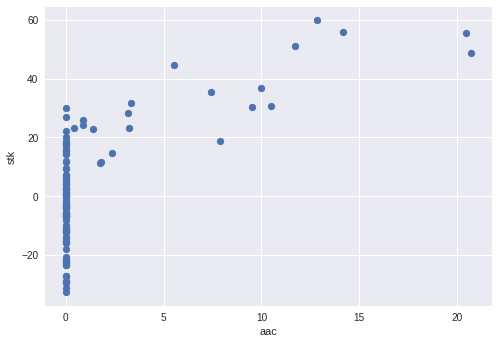

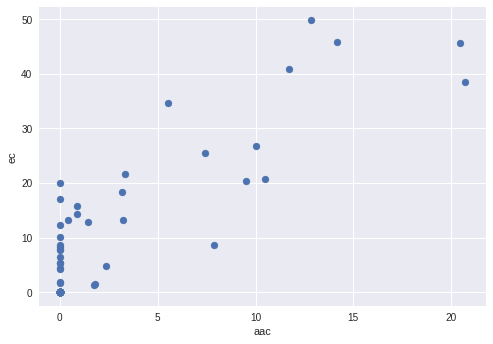

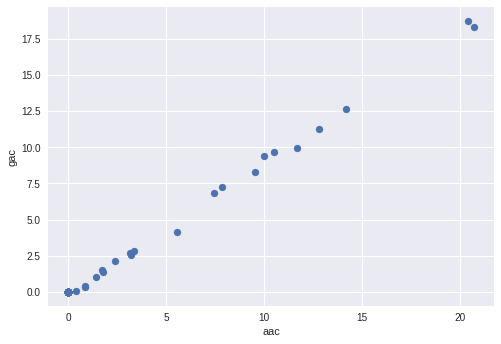

In [64]:
plt.scatter(aac,stk)
plt.xlabel('aac')
plt.ylabel('stk')
plt.show()
plt.scatter(aac,ec)
plt.ylabel('ec')
plt.xlabel('aac')
plt.show()
plt.scatter(aac,gac)
plt.ylabel('gac')
plt.xlabel('aac')
plt.show()

Therefore, gac is most highly correlated to aac. In order to improve OMC computaton of aac, we can use the distribution of gac to estimate the distribution of aac. 